# Powerlaw features: review count and number of friends
- This notebook contains the aforementioned distributions and attempts to split each distribution up into different buckets in order to add as features

Note: This file also contains a little code to round the business average ratings to the nearest 0.5 to reduce variance in feature space

In [1]:
import json
import pandas as pd 
import matplotlib as mpl
import powerlaw
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import networkx as nx
%matplotlib inline

In [2]:
# Read in user dataset
Yelp_Users = pd.read_json('YelpDataset/user.json',lines=True)
Yelp_Users['num_of_friends'] = Yelp_Users['friends'].apply(len)

# Read in reviews dataset
Yelp_Reviews = pd.read_csv('HOPEFUL.csv')

In [10]:
# Group the User data frame by the review count of a user

Review_CountDF = Yelp_Reviews.groupby("user_num_reviews")
Review_CountDF2 = Yelp_Reviews.groupby('business_num_reviews')
Num_FriendsDF = Yelp_Users.groupby("num_of_friends")
numReviewsFreqList = list(Review_CountDF.count()['average_stars'])

In [71]:
def fitCompare(myFit):
    # determines the likelihood of being a certain distribution
    print ('power_law Vs exponential: ', myFit.distribution_compare('power_law', 'exponential'))
    print ('power_law Vs truncated_power_law:  ', myFit.distribution_compare('power_law', 'truncated_power_law'))
    print ('power_law Vs stretched_exponential:  ', myFit.distribution_compare('power_law', 'stretched_exponential'))
    print ('truncated_power_law Vs exponential:  ', myFit.distribution_compare('truncated_power_law', 'exponential' ))
    print ('truncated_power_law Vs stretched_exponential:  ', myFit.distribution_compare('truncated_power_law', 'stretched_exponential'))
    print ('exponential Vs stretched_exponential:  ', myFit.distribution_compare('exponential', 'stretched_exponential'))

In [72]:
fit1 = powerlaw.Fit(numReviewsFreqList, discrete=False)
fitCompare(fit1)

Calculating best minimal value for power law fit
/home/jbowllan/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power_law Vs exponential:  (207.07923996779257, 1.2320774031342845e-08)


Assuming nested distributions


power_law Vs truncated_power_law:   (-2.064463556649363, 0.04215606950290296)
power_law Vs stretched_exponential:   (-0.8730530850051634, 0.5385938722890012)
truncated_power_law Vs exponential:   (209.14370352444197, 4.221907147387884e-09)
truncated_power_law Vs stretched_exponential:   (1.1914104716441996, 0.08414806487738692)
exponential Vs stretched_exponential:   (-207.95229305279784, 0.0)


Assuming nested distributions


In [73]:
fit1.alpha

1.6025860683104134

/home/jbowllan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


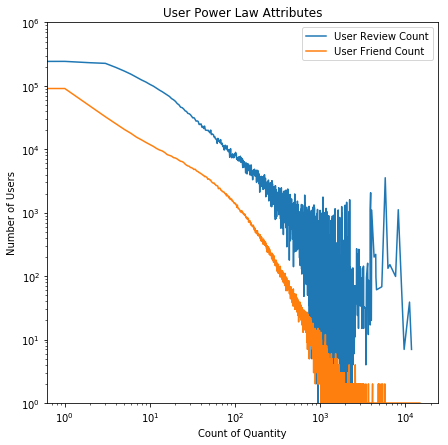

In [32]:
# A better look at the plot above 
# Beta distribution if you cut the permissible review counts at some threshold value

fig,ax = plt.subplots(figsize =(7,7))
Review_CountDF.count()['date'].plot()
Num_FriendsDF.count()['average_stars'].plot()
ax.set_xbound(lower=0.0, upper=200)
legend = ['User Review Count','User Friend Count']
plt.legend(legend)
plt.xlabel("Count of Quantity")
plt.ylabel("Number of Users")
plt.xscale('log')
plt.yscale('log')
plt.title("User Power Law Attributes")
plt.ylim(0,1000000)
plt.savefig("TechReportFigures/User_Powerlaw/userPowerlaw.png")
plt.savefig("TechReportFigures/User_Powerlaw/userPowerlaw.svg")
plt.savefig("TechReportFigures/User_Powerlaw/userPowerlaw.jpg")

plt.show()

In [76]:
numFriendsFreqList = list(Num_FriendsDF.count()['average_stars'])

In [77]:
fit2 = powerlaw.Fit(numFriendsFreqList, discrete=False)
fitCompare(fit2)

Calculating best minimal value for power law fit
/home/jbowllan/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power_law Vs exponential:  (47.302948779150285, 0.023395813613591675)
power_law Vs truncated_power_law:   (1.1975318869872353e-07, 0.9996095201883752)
power_law Vs stretched_exponential:   (0.7427825138108499, 0.3503271665855827)
truncated_power_law Vs exponential:   (47.30294865939709, 0.023395913335885483)
truncated_power_law Vs stretched_exponential:   (0.7427823940576612, 0.35033092940967203)
exponential Vs stretched_exponential:   (-46.56016626533944, 0.0)


Assuming nested distributions
Assuming nested distributions


In [78]:
fit2.alpha

2.1906384455380907

In [79]:
def frequencyInPowerRange(base,powerlim,listOfValues):
    # calculating the frequncies in between
    # 0 < base^0, 
    # base^0 <= x < base^1, 
    # base^1 <= x < base^2, 
    # base^2 <= x < base^3... 
    # base^powerlim < x
    
    # Motivation: want to categorize user features 
    
    lenList = len(listOfValues)
    maxNum = base**powerlim
    if lenList < maxNum:
        return 
    locList = []
    locList.append(listOfValues[0])  # num of instances that have 0 
    for i in range(powerlim):
        locSum = 0
        startVal = base**i
        endVal = base**(i+1)
        for frequency in listOfValues[startVal:endVal]:
            locSum+=frequency
        locList.append(locSum)
    lastIndex = base**powerlim
    lastSum = 0
    for frequency in listOfValues[lastIndex:]:
        lastSum += frequency
    locList.append(lastSum)
    return locList       
        
        

In [84]:
revCountSepExp = frequencyInPowerRange(2,6,numReviewsFreqList)
numFriendsSepExp = frequencyInPowerRange(2,6,numFriendsFreqList)
npRevCountSepExp = np.array(revCountSepExp)
npNumFriendsSepExp = np.array(numFriendsSepExp)

Text(0.5,1,'Review Count Exponential Categorization')

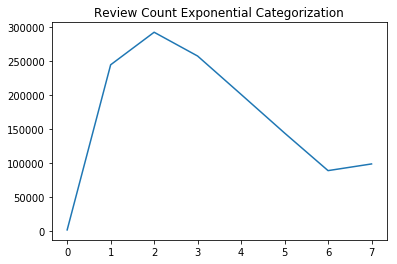

In [85]:
plt.plot(npRevCountSepExp)
plt.title("Review Count Exponential Categorization")

Text(0.5,1,'Number of Friends Exponential Categorization')

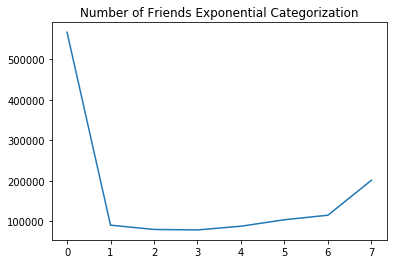

In [86]:
plt.plot(npNumFriendsSepExp)
plt.title("Number of Friends Exponential Categorization")

## Now rounding business average ratings to nearest 0.5

In [41]:
BusAv = Yelp_Reviews.groupby('business_id').agg('mean')

In [43]:
def roundtoTenthsPlace(double):
    stringOfDouble = str(double)
    onesVal = int(stringOfDouble[0:1])
    decimalVal = float(str(0) + stringOfDouble[1:])
    if (decimalVal >= .25) and (decimalVal < .75):
        return float(onesVal+0.5)
    elif decimalVal < .25:
        return float(onesVal)
    elif decimalVal >= .75:
        return float(onesVal+1)

In [60]:
BusAv['roundedAvStars'] = BusAv['stars'].apply(roundtoTenthsPlace)
busAvdf = Yelp_Reviews.groupby('business_id').agg('mean')[['stars','business_average_stars']]
busAvdf.to_csv('businessStarsRounded')
busAvdf.head(10)

,stars,business_average_stars
business_id,,
--6MefnULPED_I942VcFNA,3.135135,3.0
--7zmmkVg-IMGaXbuVd0SQ,3.851064,4.0
--8LPVSo5i0Oo61X01sV9A,4.333333,4.5
--9QQLMTbFzLJ_oT-ON3Xw,3.363636,3.5
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,4.0
--DaPTJW3-tB1vP-PfdTEg,3.666667,3.5
--DdmeR16TRb3LsjG0ejrQ,3.200000,3.0
--EF5N7P70J_UYBTPypYlA,3.000000,3.0
--EX4rRznJrltyn-34Jz1w,4.000000,4.0
